In [10]:
from keras.models import load_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['date.autoformatter.day'] = ('True')

In [8]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [9]:
model = load_model('Output/potato_model.h5')

In [11]:
df = pd.read_csv('Data/potato_dataset.csv', parse_dates=[0])

In [13]:
df.set_index('Date', inplace=True)

In [14]:
df.head()

,District Name,ndvi,savi,ndre,Rainfall,Skin_Tmp,Max_Tmp,Min_Tmp,APAR,Potato_Yield,Tomato_Yield,Tomato_b_Yield,Radish_Yield,Carrot_Yield,Cabbage_Yield,Cauliflower_Yield
Date,,,,,,,,,,,,,,,,
2018-12-16,0,0.5155,0.2945,0.3215,0.00,10.87,21.61,8.05,72.62,26.469077,13.831092,70.3,18.254333,18.282961,14.954172,15.410276
2018-12-23,0,0.4030,0.2440,0.2560,0.00,8.52,19.05,6.08,62.54,26.469077,13.831092,70.3,18.254333,18.282961,14.954172,15.410276
2018-12-30,0,0.3730,0.2385,0.2535,0.00,7.86,18.87,7.06,59.80,26.469077,13.831092,70.3,18.254333,18.282961,14.954172,15.410276
2019-01-06,0,0.5010,0.2970,0.3120,2.03,9.43,13.53,8.51,25.16,23.512821,31.328155,78.0,23.997122,13.202756,15.000000,18.314685
2019-01-27,0,0.4180,0.2850,0.2920,0.31,8.12,16.52,4.58,49.37,23.512821,31.328155,78.0,23.997122,13.202756,15.000000,18.314685


In [15]:
X = df.iloc[:,:-7]
y = df.iloc[:,-7]

In [30]:
from scipy.stats import t

In [26]:
yhat = model.predict(X)

75/75 [==============================] - 0s 3ms/step


In [27]:
df_final = pd.concat([X,y], axis=1 )

In [28]:
df_final['Prediction'] = yhat

In [29]:
df_final

,District Name,ndvi,savi,ndre,Rainfall,Skin_Tmp,Max_Tmp,Min_Tmp,APAR,Potato_Yield,Prediction
Date,,,,,,,,,,,
2018-12-16,0,0.5155,0.2945,0.3215,0.00,10.87,21.61,8.05,72.62,26.469077,25.156105
2018-12-23,0,0.4030,0.2440,0.2560,0.00,8.52,19.05,6.08,62.54,26.469077,25.243044
2018-12-30,0,0.3730,0.2385,0.2535,0.00,7.86,18.87,7.06,59.80,26.469077,25.174990
2019-01-06,0,0.5010,0.2970,0.3120,2.03,9.43,13.53,8.51,25.16,23.512821,24.900370
2019-01-27,0,0.4180,0.2850,0.2920,0.31,8.12,16.52,4.58,49.37,23.512821,25.505486
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-12,18,0.1000,0.0750,0.0240,12.06,24.62,28.41,21.27,59.52,27.419355,25.689314
2021-09-19,18,0.7720,0.4775,0.5160,6.44,24.84,28.59,21.74,90.15,27.419355,25.651049
2021-09-26,18,0.5550,0.3715,0.3540,0.39,23.73,27.51,20.51,108.22,27.419355,25.616760


In [45]:
t_stat = t.cdf(0.025,df_final['Prediction'])

In [43]:
t_upper = t.ppf(0.975, df_final['Prediction'])

In [46]:
t_upper

array([2.05889071, 2.05853355, 2.05881291, ..., 2.05702716, 2.05703067,
       2.05705863])

In [49]:
df_final['cdf'] = t_stat.reshape(-1,1)

In [50]:
df_final

,District Name,ndvi,savi,ndre,Rainfall,Skin_Tmp,Max_Tmp,Min_Tmp,APAR,Potato_Yield,Prediction,cdf
Date,,,,,,,,,,,,
2018-12-16,0,0.5155,0.2945,0.3215,0.00,10.87,21.61,8.05,72.62,26.469077,25.156105,0.509874
2018-12-23,0,0.4030,0.2440,0.2560,0.00,8.52,19.05,6.08,62.54,26.469077,25.243044,0.509874
2018-12-30,0,0.3730,0.2385,0.2535,0.00,7.86,18.87,7.06,59.80,26.469077,25.174990,0.509874
2019-01-06,0,0.5010,0.2970,0.3120,2.03,9.43,13.53,8.51,25.16,23.512821,24.900370,0.509873
2019-01-27,0,0.4180,0.2850,0.2920,0.31,8.12,16.52,4.58,49.37,23.512821,25.505486,0.509875
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-12,18,0.1000,0.0750,0.0240,12.06,24.62,28.41,21.27,59.52,27.419355,25.689314,0.509876
2021-09-19,18,0.7720,0.4775,0.5160,6.44,24.84,28.59,21.74,90.15,27.419355,25.651049,0.509876
2021-09-26,18,0.5550,0.3715,0.3540,0.39,23.73,27.51,20.51,108.22,27.419355,25.616760,0.509876


<AxesSubplot: xlabel='Date'>

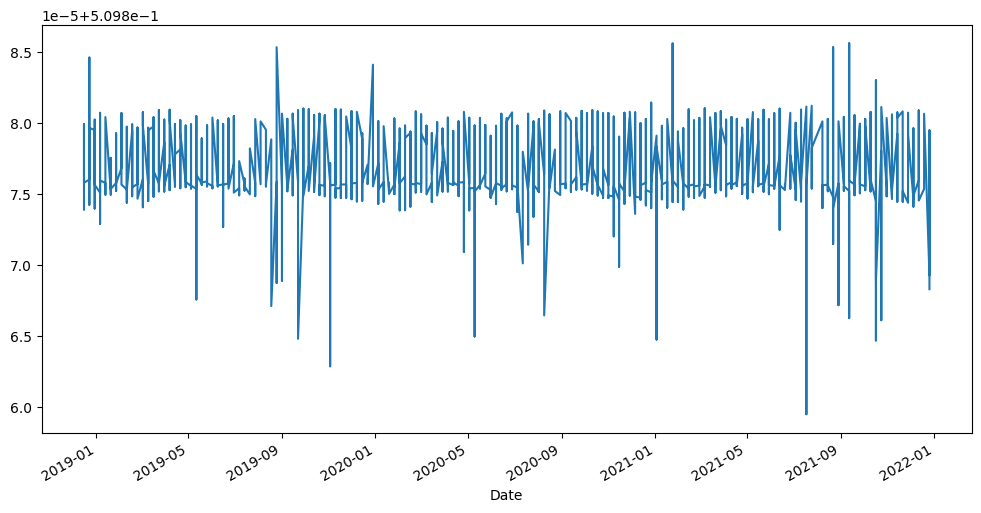

In [61]:
df_final['cdf'].plot()

<AxesSubplot: xlabel='Date'>

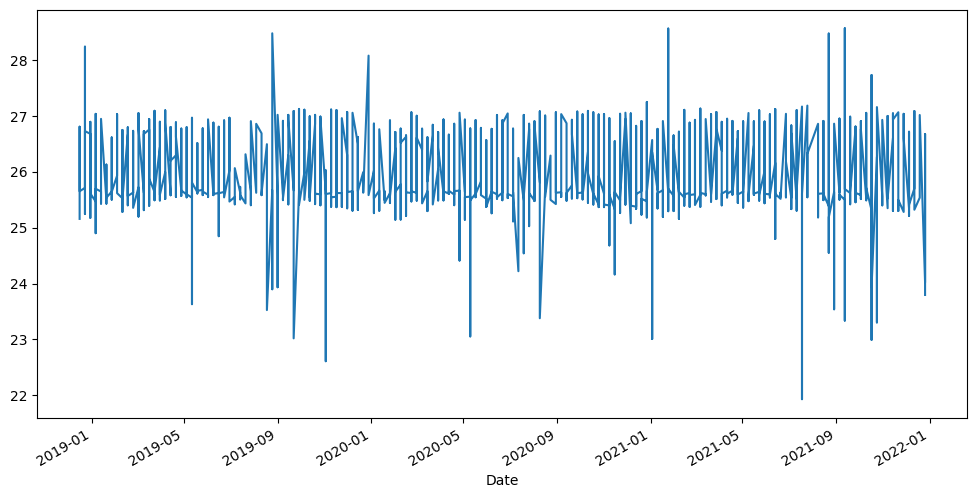

In [59]:
df_final['Prediction'].plot()